### ABADEJOS, Jason
### MAGPALE, Nicolle
### RECCION, Mavic

## Bayes' Theorem

Bayes' Theorem is a powerful theorem used to compute probabilities for questions we may not have a concrete way to compute for analytically. Bayes' Theorem, when viewed diachronistically, gives us a specific framework to build solutions to different problems by building up data. The theorem is as follows:

$$
P(H|D) = \frac{P(H)P(D|H)}{P(D)}
$$

The terminology of each item in Bayes' Theorem's diachronistic expression is as follows below:

    P(H) -   the prior; the per-hypothesis probability
    P(D|H) - the likelihood; the probability of the data happening given a certain hypothesis
    P(D) -   the normalizing constant
    P(H|D) - the posterior; the updated probability of a hypothesis given new data

This notebook will be used to create a framework to solve a few Bayesian Statistics problems.

In [54]:
### IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

## The Dice Problem

Suppose I have a box of dice that contains a 4-sided die, a 6-sided die, a 10-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. If I select a die from the box at random, roll it, and get a 7, what is the probability that I rolled each die?


## Identifying the Data and Hypotheses

The first step to answering a problem using Bayesian Statistics is by identifying the specific data and hypotheses to be used in the problem. 

In the Dice Problem, the hypotheses to take into account are given as the different possible dice that can be rolled, and the data we have is the rolled result, or the 7.

In [55]:
hypothesis = [4,6,8,10,12,20]    # list of hypotheses
data = [7]       # list of data items to take into account

## Setting the Priors

The priors, or $P(H)$, are set to some specific distribution for some statistics problems. For the exercises in this notebook, the priors will be set to the uniform distribution. Later on, we can set our priors using some other distribution method.

In [56]:
def initPriors(hypothesis):
    pH = []
    
    # get pH
    for h in hypothesis:
        pH.append(1/len(hypothesis))
    return pH     # set each prior to a uniform value

## Setting the Likelihood Function

The likelihood function, or $P(D|H)$ is found by calculating the probability that the data can happen given a certain hypothesis. The likelihood function generally is a relation between our data and our hypothesis, but can be found by other means as well.

For our Dice Problem, the likelihood function should answer the question: "How likely is it to roll a result of $\$data$ if our dice has $\$hypothesis$ sides?"

In [57]:
def likelihood(data, hypothesis):
    pDH = []
    for h in hypothesis:
        if(h < data):
            pDH.append(0)
        else:
            pDH.append(1/h)
    return pDH

## Updating Based on New Data

Once the priors and the likelihood is calculated, the Bayes' Theorem may now be applied and used to update our old beliefs into newer, more accurate probabilities based on data. We just have to code it in. To reiterate, Bayes' Theorem is as follows:

$$
P(H|D) = \frac{P(H)P(D|H)}{P(D)}
$$

In [58]:
def update(hypo, prior, data):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    
    # get pHpDH
    pHpDH = []
    pDH = likelihood(data, hypo)
    pSum = 0
    for i in range(0,len(hypo)):
        pHpDH.append(prior[i] * pDH[i])
        pSum = pSum + pHpDH[i]
        
    posterior = []
    for i in range(0,len(hypo)):
        if(pSum == 0):
            posterior.append(0)
        else:
            posterior.append(pHpDH[i]/pSum)
        
    return posterior

## Putting Everything Together

Now, let's solve the dice problem. We can add more data later on, too, but first, let's have our code running and output the answer.

[4, 6, 8, 10, 12, 20]
[0.0, 0.0, 0.3488372093023256, 0.27906976744186046, 0.23255813953488372, 0.13953488372093023]


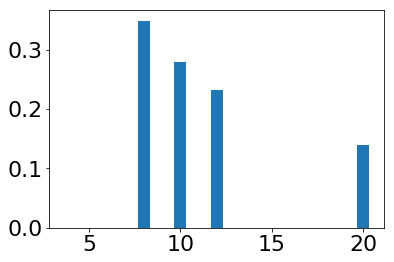

In [59]:
# given your hypothesis and data, initialize your priors.
# next, feed the data into the update function
# finally, print the values in the newly updated prior vector along with each hypothesis

prior = initPriors(hypothesis)

for d in data:
    prior = update(hypothesis, prior, d)

# plotting code
width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

print(list(hypothesis))
print(prior)

## Try More Data!

What about if the dice rolled the numbers in the array dicerolls, after rolling the 7 above? What about if the dice rolled random numbers from an n-sided dice?

[0.0, 0.0, 0.0, 0.8602282658411444, 0.13893166749299504, 0.0008400666658604926]


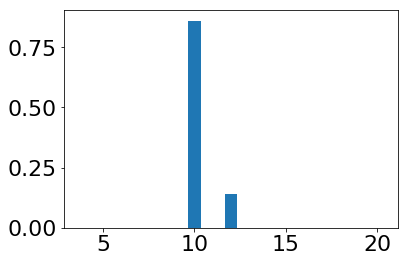

In [60]:
dicerolls = [6,8,7,7,5,4]

sides = 10       # feel free to change these variables
rolls = 10
rolldata = np.random.choice(range(1,sides+1),rolls)

data = rolldata

prior = initPriors(hypothesis)

for d in data:
    prior = update(hypothesis, prior, d)
    
# plotting code
width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

print(prior)

## What do the answers mean?

Of course, just because you have a probability distribution doesn't mean you already have all of the answers. You simply have more data; not the important information to glean from the dataset. What information can you find from running this?

## The Locomotive Problem

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

Try to find an average guess for the number of locomotives owned by the railroad via the Bayes' Theorem. Let the number of hypotheses be 1000 at first.

Note: the posterior mean is found by $\mu = \sum XP(X)$.

Try to reason out why we can't just use the highest value, or 60, in this case.

333.41989326371095

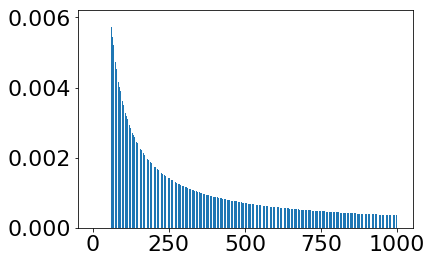

In [61]:
# define your hypotheses
N = 1000
hypothesis = range(1,N+1)

# create your likelihood function
data = [60]

# initialize priors
prior = initPriors(hypothesis)

# update priors based on data
for d in data:
    prior = update(hypothesis, prior, d)

# find the dataset mean
mean = 0
for i in range(0, len(prior)):
    mean = mean + hypothesis[i] * prior[i]



# plotting code

width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

mean

## Is our posterior mean a 'nice' value?

To make any progress on the locomotive problem we had to make a few assumptions, and some of them were pretty arbitrary. In particular, we chose a uniform prior from 1 to 1000, without much justification for choosing 1000, or for choosing a uniform distribution.

What if our values were different? Try changing the number of predicted trains and see what the effect is on the posterior mean.  Try using the values 500 and 2000 for the number of hypotheses.

In [62]:
# try different hypotheses counts 500, 1000, and 2000

def bayes(hypothesis, N, data):
    hypothesis = range(1,N+1)    

    # initialize priors
    prior = initPriors(hypothesis)

    # update priors based on data
    for d in data:
        prior = update(hypothesis, prior, d)

    # find the dataset mean
    mean = 0
    for i in range(0, len(prior)):
        mean = mean + hypothesis[i] * prior[i]
    
    return mean

N = [500,1000,2000] 
means = []
for i in range(0, len(N)):
    means.append(bayes(hypothesis, N[i], data))
    print(N[i], " ", means[i])

500   207.079227983409
1000   333.41989326371095
2000   552.179017164631


## Curbing the Variance: More Data

Our means vary a lot! The simple reason is because we have only one data point, so our priors matter possibly too much. If we added more data/make more train observations, our means would vary a bit less. Try it out!

In [63]:
data = [60,30,90]  # the first observation of 60 is already included, so initialize priors before running with all the data!

N = [500,1000,2000] 
means = []
for i in range(0, len(N)):
    means.append(bayes(hypothesis, N[i], data))
    print(N[i], " ", means[i])

500   151.84958795903825
1000   164.3055864227336
2000   171.3381810915094


## Curbing the Variance: Better Priors

Another way to curb the variance is by assigning better priors to our dataset by gathering some background information, because it's probably unreasonable to assume that a train-operating company with 1000 locomotives is just as likely as a company with only 1.

With some effort, we could probably find a list of companies that operate locomotives in the area of observation. Or we could interview an expert in rail shipping to gather information about the typical size of companies. But even without getting into the specifics of railroad economics, we can make some educated guesses.

In most fields, there are many small companies, fewer medium-sized companies, and only one or two very large companies. In fact, the distribution of company sizes tends to follow a power law, as Robert Axtell reports in Science (see http://www.sciencemag.org/content/293/5536/1818.full.pdf).

Mathematically, a power law means that the number of companies with a given size is inversely proportional to size, or

$$P(x) \propto \Big(\frac{1}{x}\Big)^\alpha$$

In [64]:
# rewrite the prior distribution function to emulate the power law
# note: you can do this by assigning each hypothesis an initial 'score' on the power law 
#       and then normalizing the probabilities such that they add up to 1


def initPriors(hypothesis):
    pH = []
    priors = []
    sum = 0
    # get pH
    for i in range(0, len(hypothesis)):
        pH.append(1/(i+1))
        sum = sum + pH[i]
    
    for i in range(0, len(hypothesis)):
        priors.append(pH[i] / sum)
        
    return priors

## Point Estimates and Interval Estimates

We use posterior means to describe our dataset because the mean of a dataset is the value that minimizes error if a lot of different guesses are made and the error is totalled up throughout those guesses. But in the end, the posterior mean is also one single point; or a single guess to what the true 'answer' to the question is. If we wanted to make our guess more general with a certain level of certainty, we have equations for Confidence Intervals, but they only work for normal distributions, and our data is definitely not normally distributed.

Fortunately, calculation of an interval given a large normalized dataset is very simple:

In [65]:
def percentile(prior, hypothesis, percent):
    p = percent / 100
    
    total = 0
    
    for i in range(len(hypothesis)):
        total += prior[i]
        if (total >= p):
            return hypothesis[i]

The *percentile* function is a function that calculates a cumulative percent of the dataset starting from zero, much like how our Z-table works. To use the function to calculate an 90% interval estimate for the number of trains N, simply call $P(5)$ and $P(95)$ for a 90% interval.

In [66]:
print(percentile(prior, hypothesis, 5),percentile(prior, hypothesis, 95))

69 869


## Homework #1: More Train Companies?!

In our first train example, we made the assumption that we have only one train company with N trains. But that isn't true to real life, as one railroad may be used by multiple train companies with different numbers of trains.

Try to extend the current railroad example to multiple train companies; where you are equally likely to see any train operated by any company.

Some arbitrary assumptions:
* overall hypothesis corresponds to the train numbers of each company
* data corresponds to the order of trains seen
* the number of the companies is given by N
* the number of trains each company has is generated randomly from 1-N
* the distribution of trains for any given company follows an inverse-power law distribution


The solution starts with the initialization of the necessary variables such as N, the number of trains per company, data, list of priors. Then, for all trains that we see, we get the probability of each train per company. First, we initialize the accumulated priors and the accumulated hypothesis. Next, for each company, we compute for the proability of each train using bayes method. We only initialize our priors only once so that it won't be changed in the long run. While getting the probability using the bayes method, we add the resulting prior and hypothesis to their respective accumulated list. Then, after getting the probability of each train using the bayes method, we use the accumulated hypothesis and accumulated priors to compute for the probability of a train of that company. 

In [67]:
# initialize number of companies
N = 10

# initialize number of trains per company
nTrainsPerCompany = list(np.random.choice(range(1, N+1), N))

# initialize data
data = [6]

# initialize list of prior
prior = [0] * N
priorPerData = []

# iterate per element in data
for i in range(0, len(data)):
    
    # initialize list for accumulated priors of all companies
    priorOfAllCompanies = []
    
    # initialize list for accumulated hypothesis of all companies
    hypothesisOfAllCompanies = []
    
    # iterate through all companies
    # bayes rule
    for j in range(0, N):
        
        # prepare hypothesis
        hypothesis = range(1, nTrainsPerCompany[j] + 1)
        
        # initialize priors only once
        if(i == 0):
            prior[j] = initPriors(hypothesis)
        
        # update prior
        prior[j] = update(hypothesis, prior[j], data[i])
        
        # add to accumulated priors of all companies
        priorOfAllCompanies.extend(prior[j])
        
        # add to accumulated hypothesis of all companies
        hypothesisOfAllCompanies.extend(hypothesis)
        print("ITERATION ", i, prior[j])
    
    # compute for probability of seeing the train in that company
    priorPerData = update(hypothesisOfAllCompanies, priorOfAllCompanies, data[i])
    print("===")
    ctr = 0
    for i in range(0,len(nTrainsPerCompany)):
        for j in range(1, nTrainsPerCompany[i]+1):
            print("Company", i, "Train #", j, "=", priorPerData[ctr])
            ctr = ctr + 1
    print("===")

# width = 1/1.5
# plt.bar(nTrainsPerCompany, priorPerData, width)
# fig = plt.gcf()

ITERATION  0 [0]
ITERATION  0 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
ITERATION  0 [0, 0]
ITERATION  0 [0, 0]
ITERATION  0 [0, 0, 0, 0, 0]
ITERATION  0 [0, 0, 0, 0, 0]
ITERATION  0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.3647454122512277, 0.26797622124579995, 0.20516929439131562, 0.1621090721116568]
ITERATION  0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.5764705882352941, 0.4235294117647058]
ITERATION  0 [0, 0, 0, 0, 0]
ITERATION  0 [0]
===
Company 0 Train # 1 = 0.0
Company 1 Train # 1 = 0.0
Company 1 Train # 2 = 0.0
Company 1 Train # 3 = 0.0
Company 1 Train # 4 = 0.0
Company 1 Train # 5 = 0.0
Company 1 Train # 6 = 0.35766852768369706
Company 2 Train # 1 = 0.0
Company 2 Train # 2 = 0.0
Company 3 Train # 1 = 0.0
Company 3 Train # 2 = 0.0
Company 4 Train # 1 = 0.0
Company 4 Train # 2 = 0.0
Company 4 Train # 3 = 0.0
Company 4 Train # 4 = 0.0
Company 4 Train # 5 = 0.0
Company 5 Train # 1 = 0.0
Company 5 Train # 2 = 0.0
Company 5 Train # 3 = 0.0
Company 5 Train # 4 = 0.0
Company 5 Train # 5 = 0.0
Company 6 Train # 1 = 0.0
Com

References: 
    Think Bayes, Green Tea Press, Allen B. Downey